In [38]:
import os, sys, time
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import arviz as az

# if "SVG" in os.environ:
#     %config InlineBackend.figure_formats = ["svg"]
# az.style.use("arviz-darkgrid")

sns.set_style("whitegrid")

In [3]:
df = pd.read_excel('congress-trading-all.xlsx')

In [4]:
df['Ticker']

0                  PANW
1                   GLA
2                  PANW
3        GLAS FUNDS, LP
4                   SPG
              ...      
46358               CAT
46359                PG
46360               KSU
46361              EP$C
46362              EP$C
Name: Ticker, Length: 46363, dtype: object

In [5]:
# obtain distribution of data by ticker
tickers = np.unique(df['Ticker'].values)

In [6]:
sum_tickers = {}
Nrows, Ncol = df.shape
Nt = len(tickers)
for ticker in tqdm(tickers):
    is_ticker = (df['Ticker'] == ticker)
    df_tick = df[is_ticker]
    sum_tickers[ticker] = len(df_tick)

100%|██████████| 3962/3962 [00:08<00:00, 449.70it/s]


In [7]:
sum_arr = []
for ticker in tqdm(tickers):
    sum_arr.append(sum_tickers[ticker])
sum_arr = np.array(sum_arr)
sorted_idx = np.argsort(sum_arr)

idx = sorted_idx[-1:-31:-1]
high_tickers = tickers[idx]
high_counts = sum_arr[idx]

100%|██████████| 3962/3962 [00:00<00:00, 2419602.86it/s]


<BarContainer object of 30 artists>

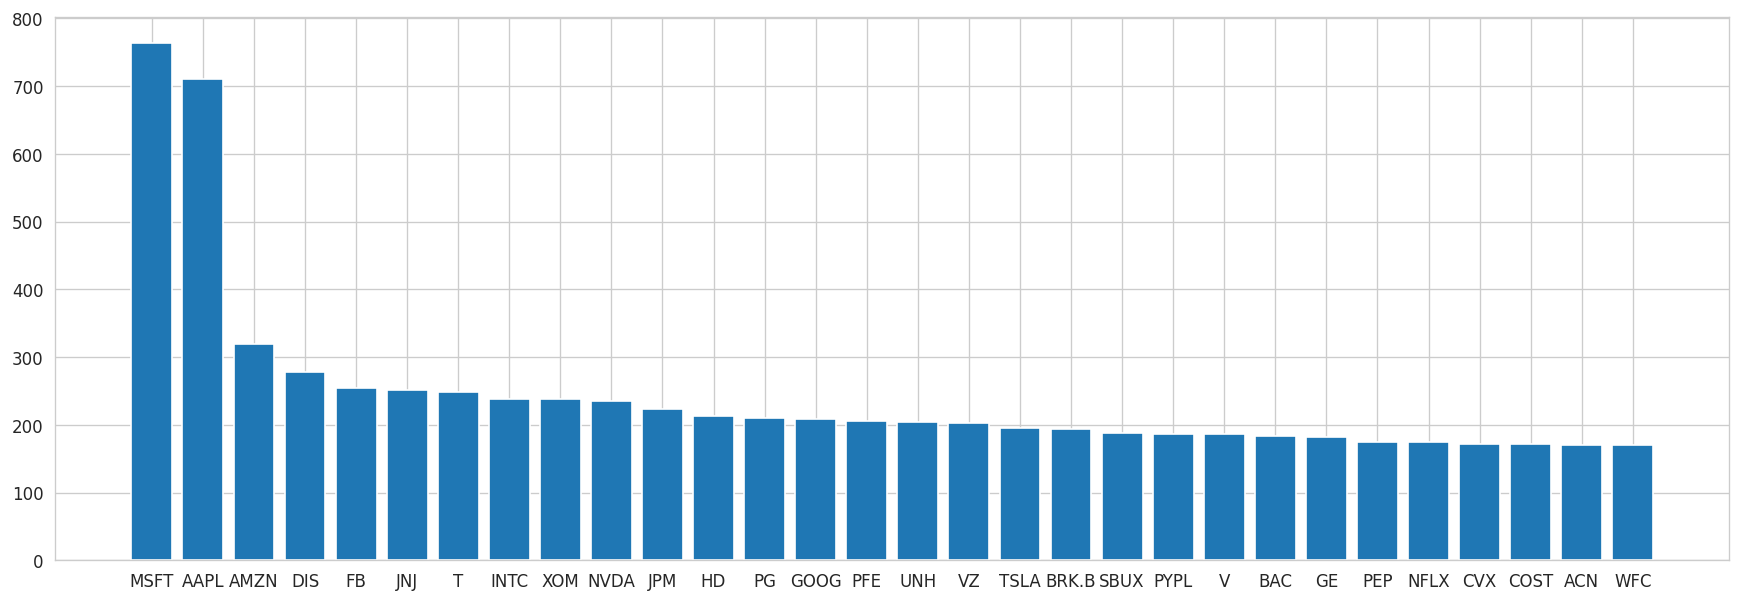

In [32]:
fig = plt.figure(figsize = (18, 6), dpi = 120)
ax = fig.add_subplot(111)
ax.bar(high_tickers, high_counts)

In [9]:
df.groupby('Ticker')['Ticker'].value_counts(ascending=True)

Ticker
07/01/28           1
07/01/36           1
0QZI.IL            2
12/01/37           1
13.WEEK MATURE     1
                  ..
ZU                 1
ZUO               11
ZURVY              5
^MWE               1
^RGP               1
Name: count, Length: 3962, dtype: int64

In [10]:
df['Ticker'].value_counts(ascending = True)

Ticker
EJPRY      1
GTCSX      1
HUB.A      1
DSCSY      1
DRPRY      1
        ... 
FB       254
DIS      278
AMZN     319
AAPL     711
MSFT     764
Name: count, Length: 3962, dtype: int64

<BarContainer object of 20 artists>

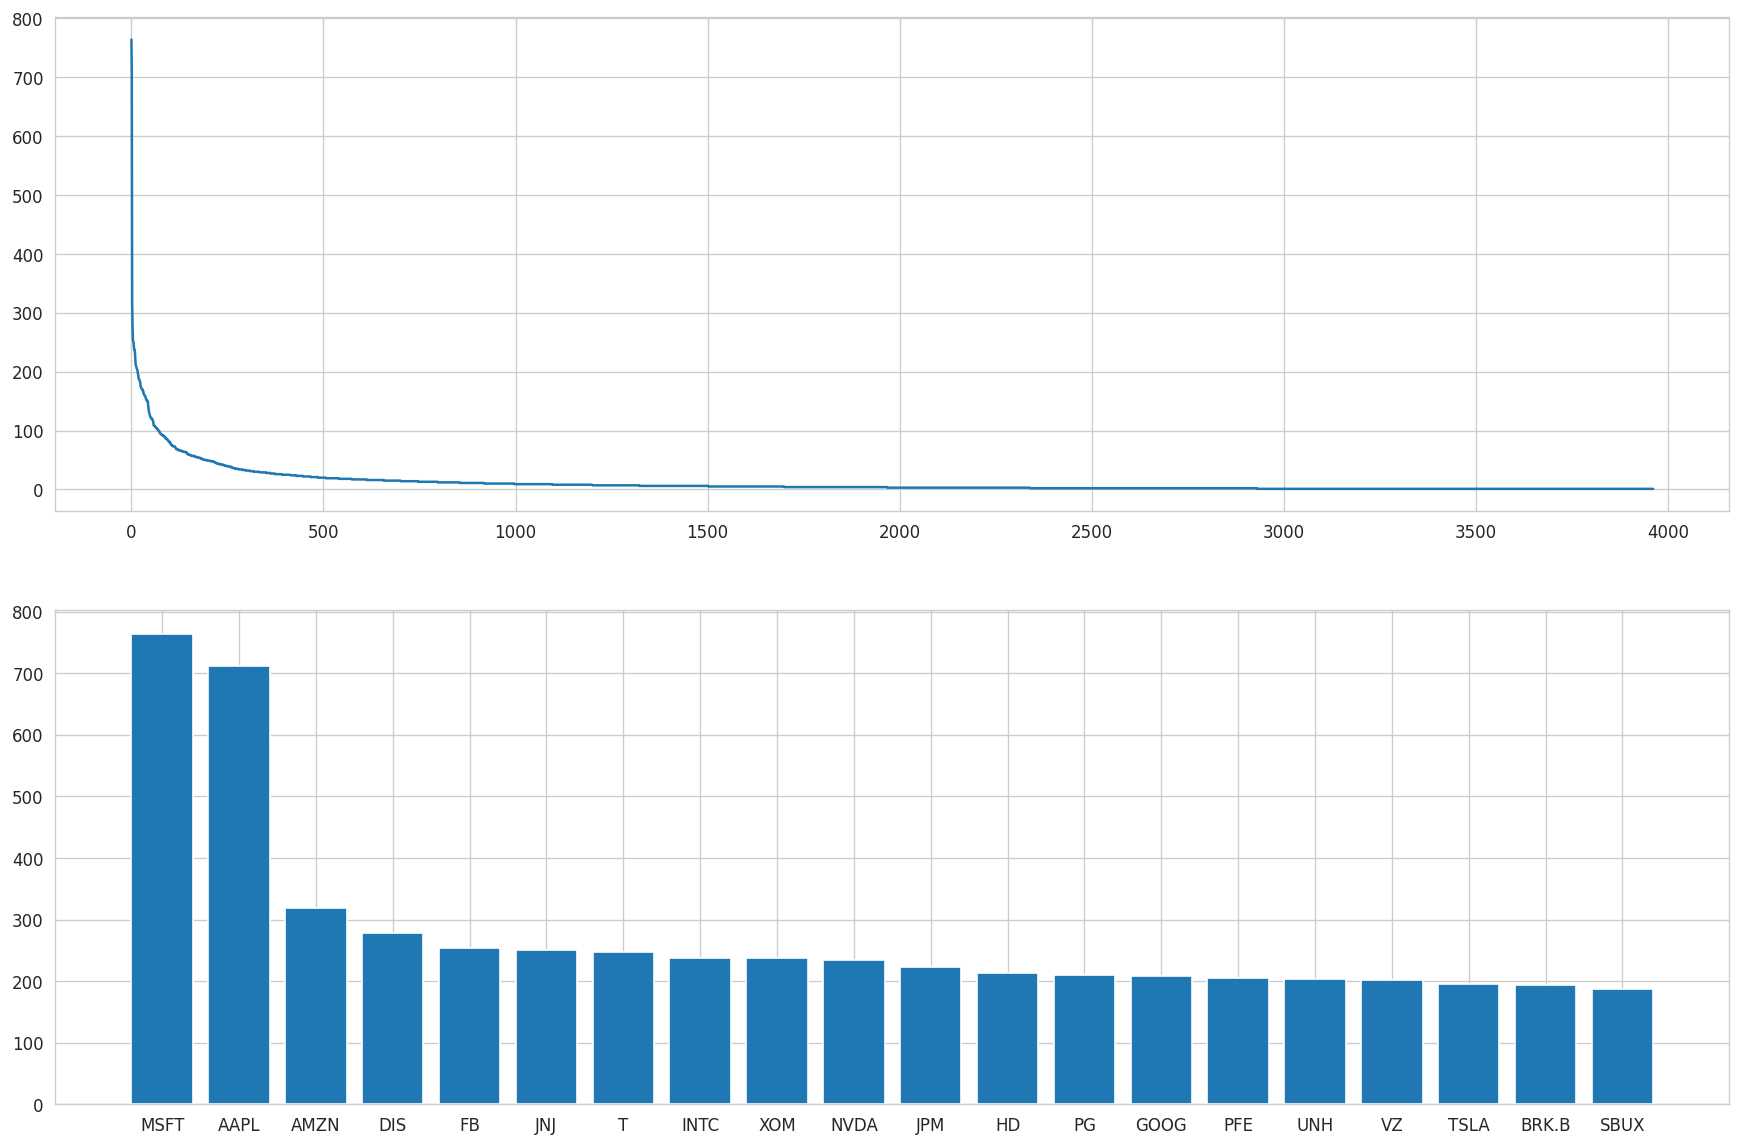

In [33]:
df_by_counts = df['Ticker'].value_counts(ascending = True)[::-1]

fig = plt.figure(figsize = (18, 12), dpi = 120)
ax = fig.add_subplot(211)
ax.plot(df_by_counts.values)

ax = fig.add_subplot(212)
ax.bar( df_by_counts.index[:20], df_by_counts.values[:20])

In [10]:
is_msft = df['Ticker'] == 'MSFT'
msft_df = df[is_msft].reset_index()
msft_df['Traded']
msft_df['Dates'] = msft_df['Traded']

In [11]:
import yfinance as yf
msft_yf_tick = yf.Ticker('MSFT')
msft_yf = msft_yf_tick.history(period = "12mo")
# msft_ydf = yf.download('MSFT', start='2023-01-01')
# msft_yf = pd.DataFrame(msft_yf_tick.history(period = "12mo"), index = pd.RangeIndex(start = 0, stop = 100))

/home/edr/mambaforge/envs/cbase/lib/python3.9/site-packages/yfinance/utils.py:647: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [12]:
ydf_dates_unprocessed = msft_yf.index.tolist()
ydf_dates = []
for t in ydf_dates_unprocessed:
    ydf_dates.append(
        str(t.year) + '-' + str.format("{:02d}", t.month) + '-' + str.format("{:02d}", t.day)
    )

In [13]:
print(ydf_dates)

['2023-03-08', '2023-03-09', '2023-03-10', '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06', '2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13', '2023-04-14', '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20', '2023-04-21', '2023-04-24', '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28', '2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-08', '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12', '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26', '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16', '2023

In [14]:
msft_yf['Dates'] = ydf_dates

In [15]:
merged_df = msft_df.merge(msft_yf, how = 'inner', on = ['Dates'])

In [16]:
msft_df['fDates'] = pd.to_datetime(msft_df['Dates'])
msft_df['fDates']

0     2024-01-25
1     2024-01-25
2     2024-01-23
3     2024-01-23
4     2024-01-23
         ...    
759   2014-01-08
760   2014-01-08
761   2013-12-30
762   2013-09-15
763   2013-07-19
Name: fDates, Length: 764, dtype: datetime64[ns]

In [17]:
msft_df_dates = msft_df['fDates'].value_counts()

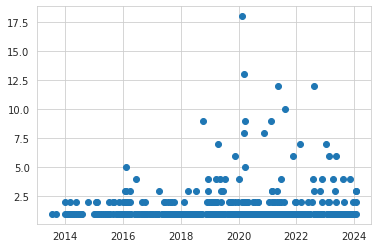

In [34]:
plt.scatter(msft_df_dates.index, msft_df_dates.values)

Text(0, 0.5, 'log # Trades')

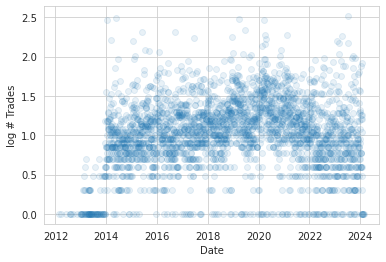

In [35]:
df['Dates'] = df['Traded']
df['fDates'] = pd.to_datetime(df['Dates'])
df_dates = df['fDates'].value_counts()
plt.scatter(df_dates.index, np.log10(df_dates.values), alpha = 0.1)
plt.xlabel('Date')
plt.ylabel('log # Trades')

In [23]:
df['fDates'][0].year

2024

In [24]:
import datetime
from datetime import date

df_dates = [
    ( date(t.year, t.month, t.day) - date(t.year, 1, 1) ).days / 
    ( date(t.year+1, 1, 1) - date(t.year, 1, 1) ).days
    + t.year for t in df['fDates']
]

In [25]:
df['f2Dates'] = df_dates
df_dates2 = df['f2Dates'].value_counts()

<Axes: >

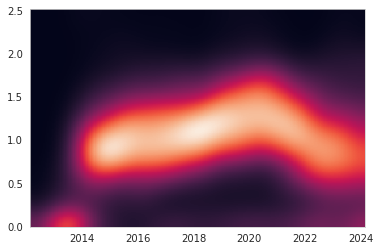

In [36]:
az.plot_kde(df_dates2.index, np.log10(df_dates2.values), contour = False, fill_last = False, plot_kwargs = {'alpha':0.1, 'color':'k'})

In [29]:
# from scipy.signal import periodogram

# x = np.array(df_dates2.index)
# y = np.array(df_dates2.values)
# f, Pxx_spec = periodogram(x, y)
# plt.semilogy(f, np.sqrt(Pxx_spec))
# plt.xlabel('frequency [Hz]')
# plt.ylabel('Linear spectrum [V RMS]')

[ 0.4483631  -0.31432266  0.09011113 ...  0.03707063  0.02129565
 -0.5       ]


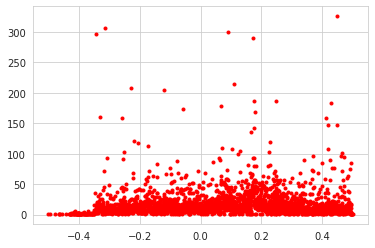

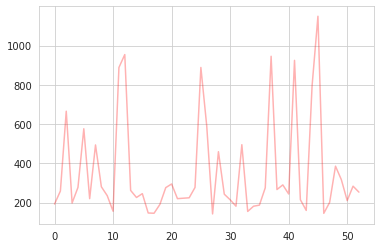

In [39]:
# took code from this post https://stackoverflow.com/questions/63534781/how-to-obtain-frequencies-in-non-uniform-dfft
# requires rescaling input space to [-1/2, 1/2] https://github.com/jakevdp/nfft/blob/master/notebooks/NFFTBasicUsage.ipynb

import numpy as np
from nfft import nfft

x = np.array(df_dates2.index)
x = (x - np.min(x)) / ((np.max(x) - np.min(x))) - 0.5
y = np.array(df_dates2.values)

# number of sample points
N = len(x)

# Simulated non-uniform data
print(x)
y_f = np.abs(nfft(x, y))

fig, axs = plt.subplots(1)
fig_f, axs_f = plt.subplots(1)

axs.plot(x, y, '.', color='red')

xf = np.fft.fftfreq(N,1./N)

axs_f.plot(xf[:int(N/50)], y_f[:int(N/50)], color='red', alpha = 0.3)

plt.show()

AttributeError: 'numpy.datetime64' object has no attribute 'year'